In [126]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import scipy 
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score

In [77]:
df = pd.read_csv('diabetes_binary.csv')

In [78]:
df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [80]:
df.isnull()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70690,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


No null values. All float data types.

In [81]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


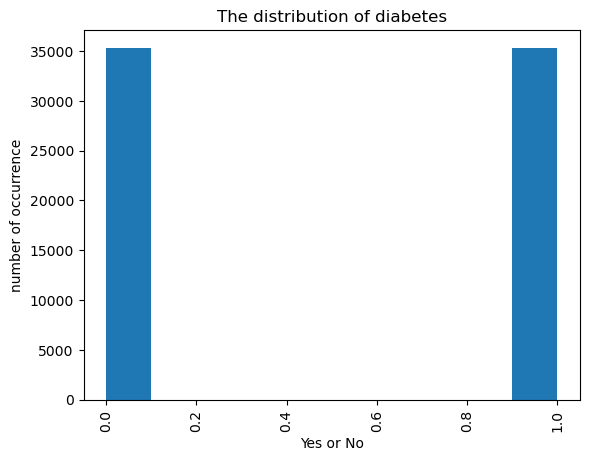

In [82]:
plt.hist(df.Diabetes_binary)
plt.title("The distribution of diabetes")
plt.xlabel("Yes or No")
plt.xticks(rotation=90)
plt.ylabel("number of occurrence")
plt.show()

This data set has a 50-50 split of having or not having diabetes.

In [83]:
diabetes_yes = df[(df['Diabetes_binary']== 1.0)]
diabetes_yes.info()

diabetes_no = df[(df['Diabetes_binary']== 0.0)]
diabetes_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35346 entries, 35346 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       35346 non-null  float64
 1   HighBP                35346 non-null  float64
 2   HighChol              35346 non-null  float64
 3   CholCheck             35346 non-null  float64
 4   BMI                   35346 non-null  float64
 5   Smoker                35346 non-null  float64
 6   Stroke                35346 non-null  float64
 7   HeartDiseaseorAttack  35346 non-null  float64
 8   PhysActivity          35346 non-null  float64
 9   Fruits                35346 non-null  float64
 10  Veggies               35346 non-null  float64
 11  HvyAlcoholConsump     35346 non-null  float64
 12  AnyHealthcare         35346 non-null  float64
 13  NoDocbcCost           35346 non-null  float64
 14  GenHlth               35346 non-null  float64
 15  MentHlth       

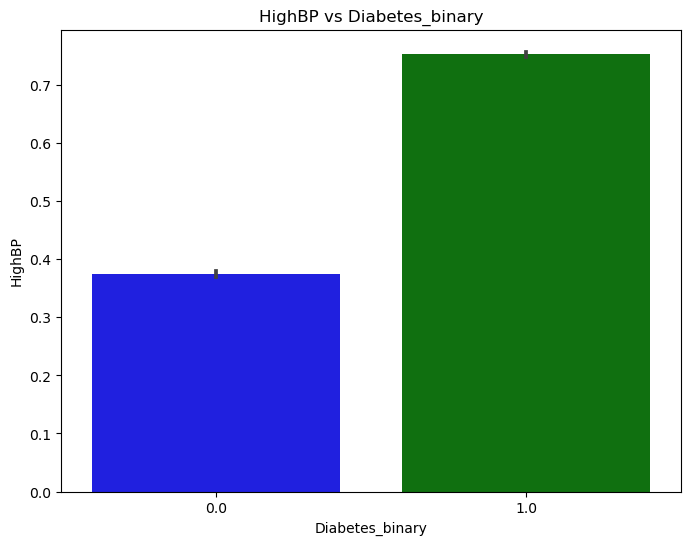

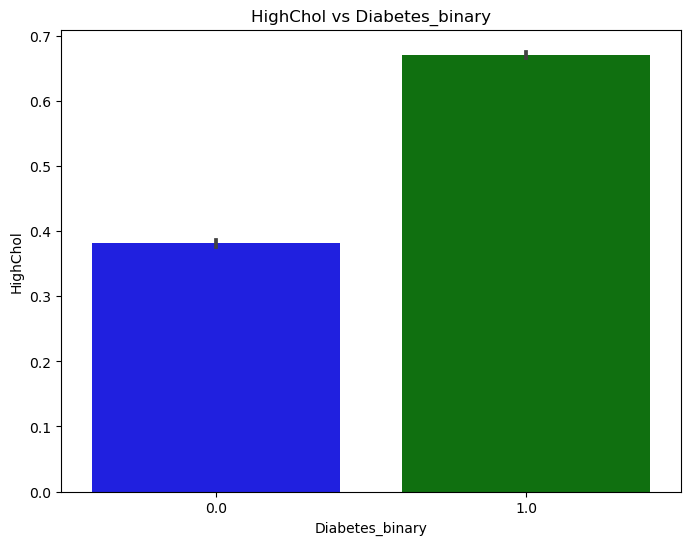

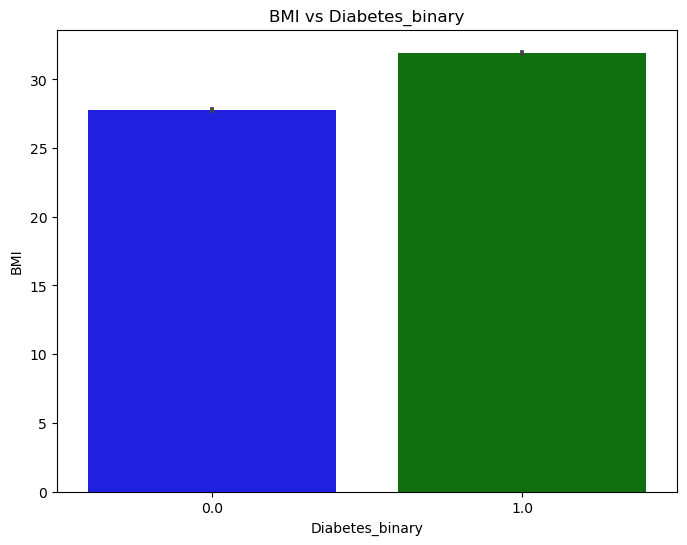

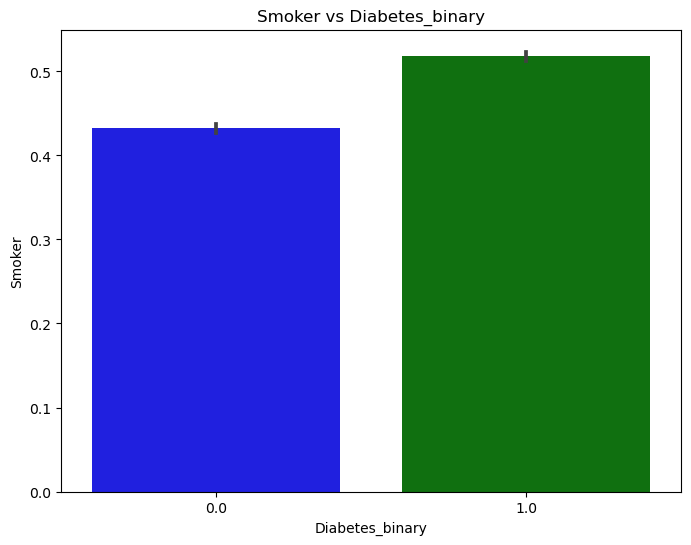

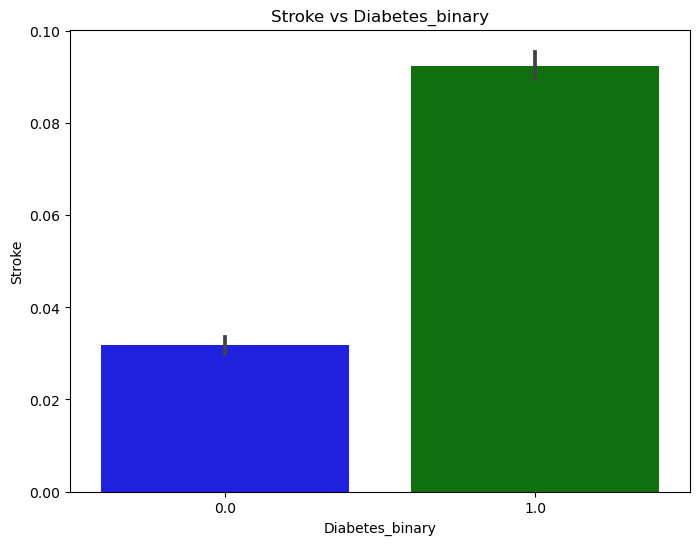

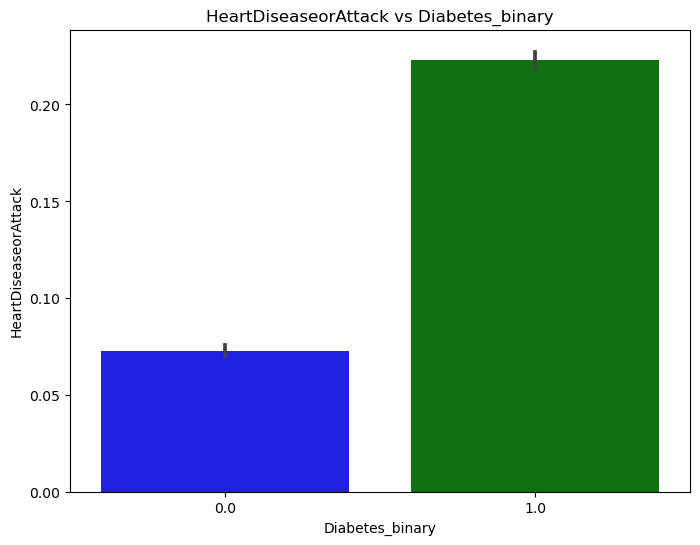

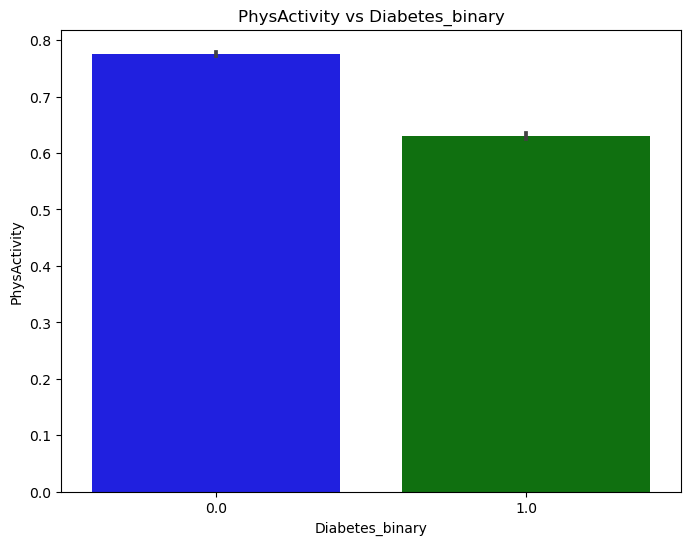

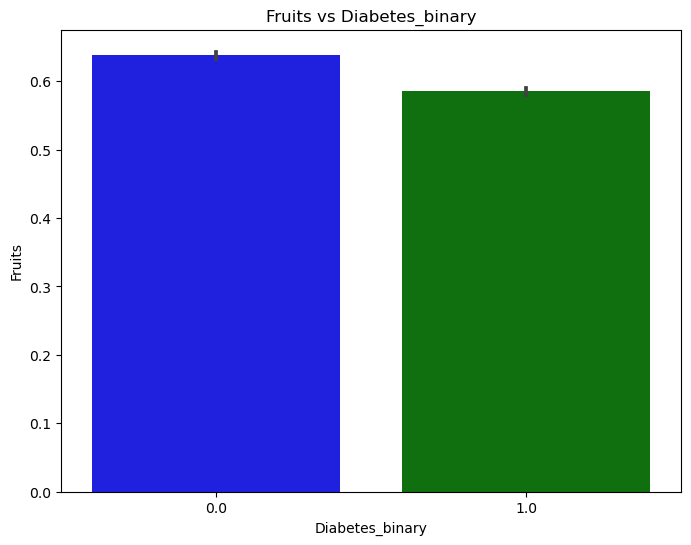

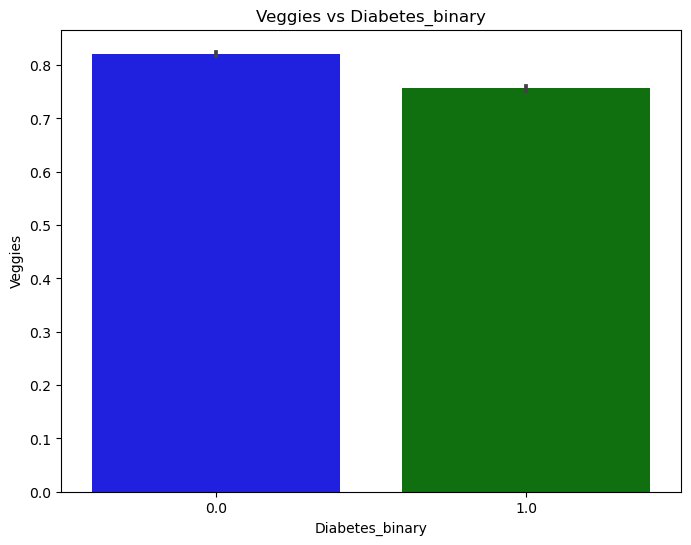

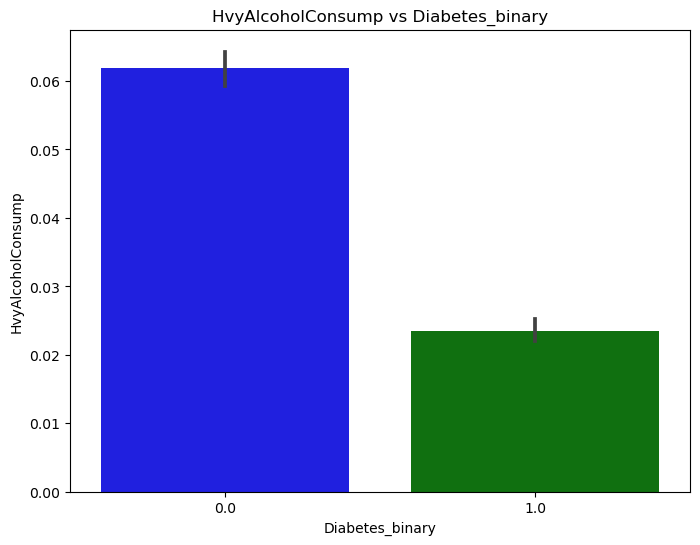

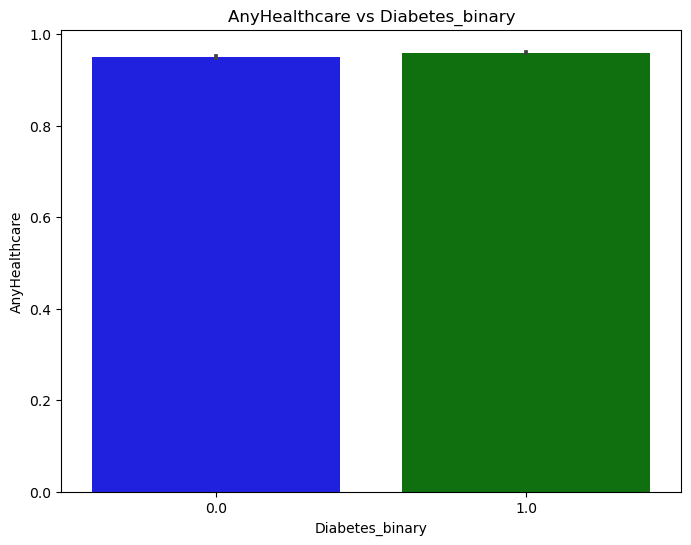

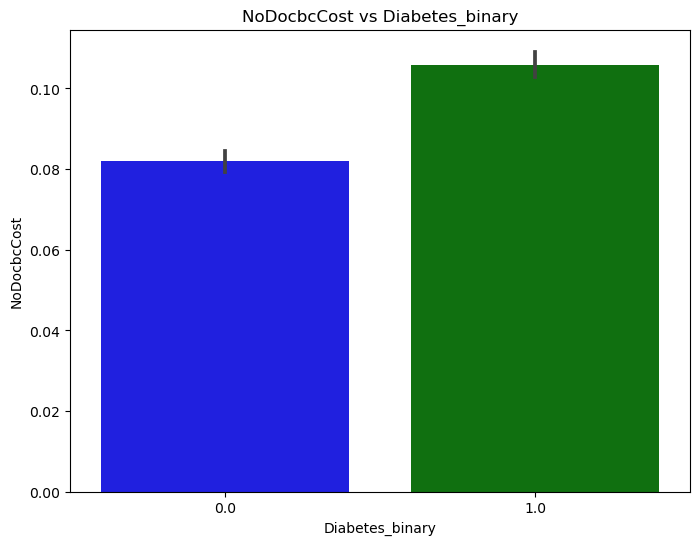

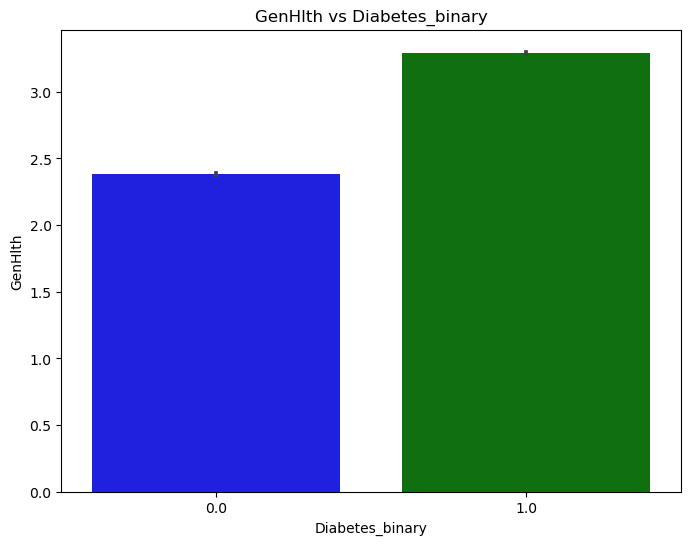

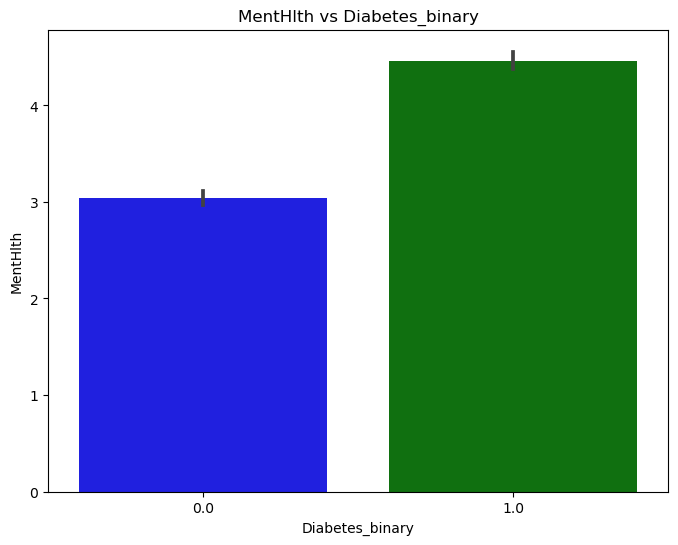

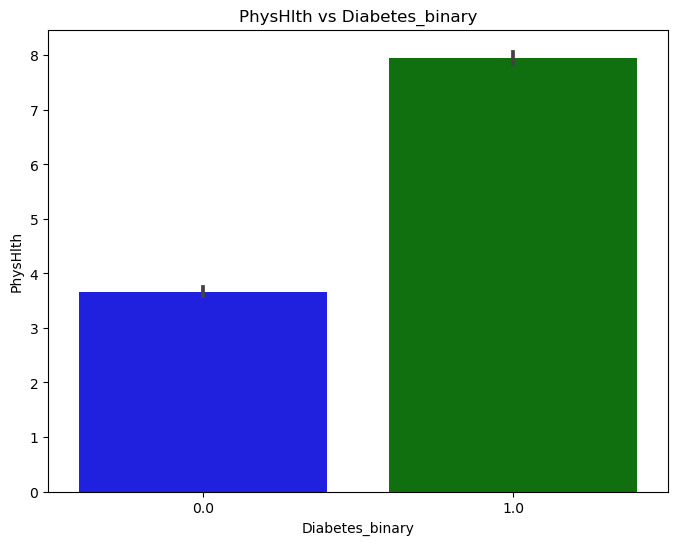

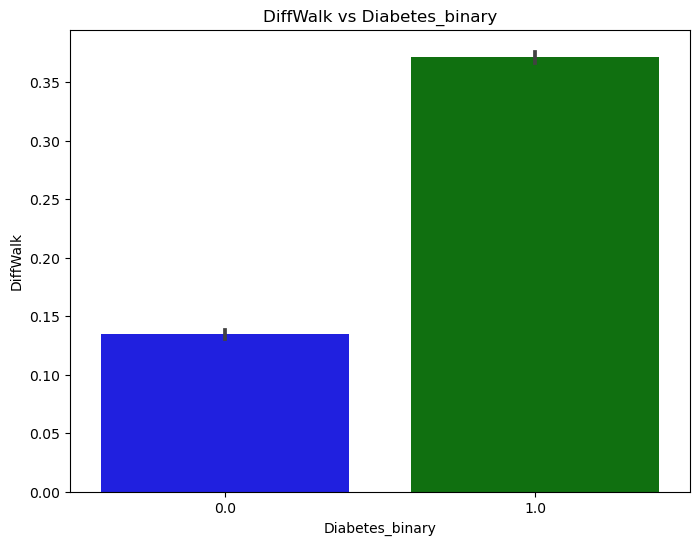

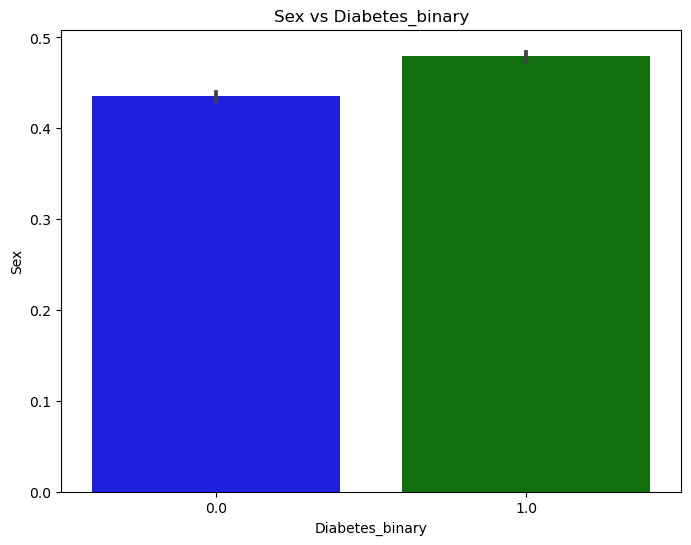

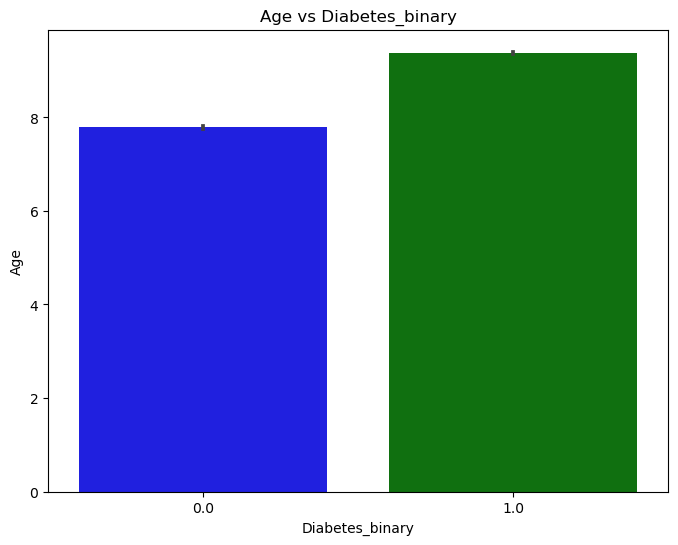

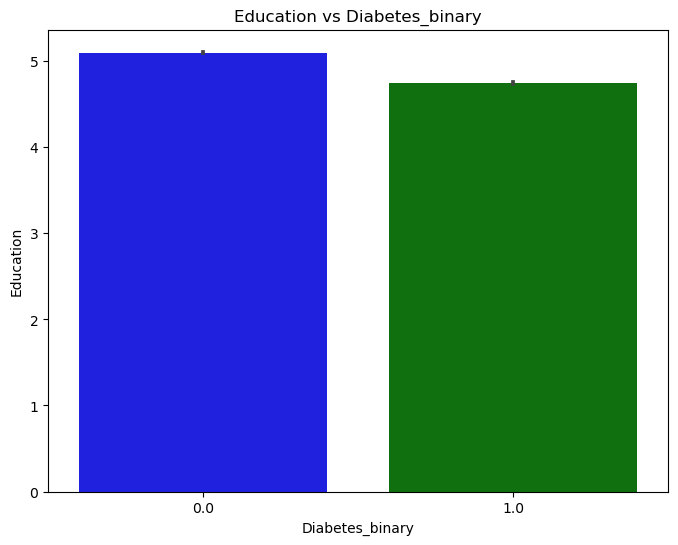

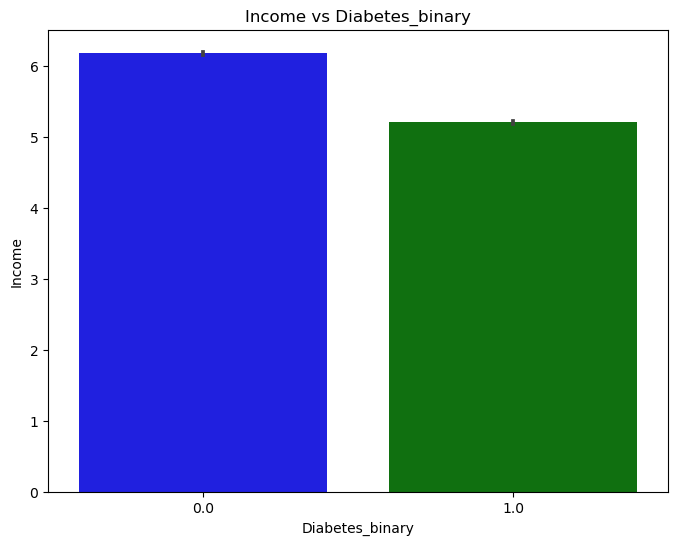

In [84]:
# Marking 'diabetes' is the target variable
target_variable = 'Diabetes_binary'

comparison_variables = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']

# Define the colors for the three categories
colors = {0: 'blue', 1: 'green', 2: 'red'}

for var in comparison_variables:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=df,x=target_variable, y=var, palette=colors)
    plt.title(f"{var} vs {target_variable}")
    plt.show()

Some variables appear to have a stronger correlation to the target than others. Variables with the strongest correlations seem to be: bp, chol, stroke, heart disease, heavy alcohol, Gen health, mental health, phys health, and diff walk.

In [85]:
print(stats.describe(diabetes_yes['HighBP']))
print(stats.describe(diabetes_no['HighBP']))

DescribeResult(nobs=35346, minmax=(0.0, 1.0), mean=0.7526735698523171, variance=0.1861613339269757, skewness=-1.1712543433070524, kurtosis=-0.6281632632843657)
DescribeResult(nobs=35346, minmax=(0.0, 1.0), mean=0.37424319583545523, variance=0.23419185190235103, skewness=0.5197347330271617, kurtosis=-1.7298758072851848)


Looks workable. Kurtosis and Skewness are close to 0.

In [86]:
print(stats.describe(diabetes_yes['HighChol']))
print(stats.describe(diabetes_no['HighChol']))

DescribeResult(nobs=35346, minmax=(0.0, 1.0), mean=0.6701182594918803, variance=0.22106603213114512, skewness=-0.7236458266537923, kurtosis=-1.4763367175665498)
DescribeResult(nobs=35346, minmax=(0.0, 1.0), mean=0.38128784020822726, variance=0.23591409753893683, skewness=0.4888261140418475, kurtosis=-1.761049030230747)


Looks workable. Kurtosis and Skewness are close to 0.

In [87]:
print(stats.describe(diabetes_yes['Stroke']))
print(stats.describe(diabetes_no['Stroke']))

DescribeResult(nobs=35346, minmax=(0.0, 1.0), mean=0.09245742092457421, variance=0.08391142024100981, skewness=2.8138347764727465, kurtosis=5.917666149287429)
DescribeResult(nobs=35346, minmax=(0.0, 1.0), mean=0.03188479601652238, variance=0.030869029138191513, skewness=5.32877521582032, kurtosis=26.395845300740866)


Not workable. Kurtosis and Skewness are not close to 0.

In [88]:
print(stats.describe(diabetes_yes['HeartDiseaseorAttack']))
print(stats.describe(diabetes_no['HeartDiseaseorAttack']))

DescribeResult(nobs=35346, minmax=(0.0, 1.0), mean=0.22288236292649805, variance=0.1732107156561055, skewness=1.3317200192994911, kurtosis=-0.22652179019696383)
DescribeResult(nobs=35346, minmax=(0.0, 1.0), mean=0.07273807502970633, variance=0.06744915572495758, skewness=3.2903498186250033, kurtosis=8.8264019289256)


Not workable. Kurtosis and Skewness are not close to 0.

In [89]:
print(stats.describe(diabetes_yes['HvyAlcoholConsump']))
print(stats.describe(diabetes_no['HvyAlcoholConsump']))

DescribeResult(nobs=35346, minmax=(0.0, 1.0), mean=0.02353873139817801, variance=0.022985309816854323, skewness=6.285481623292065, kurtosis=37.50727923674227)
DescribeResult(nobs=35346, minmax=(0.0, 1.0), mean=0.06190233689809314, variance=0.05807208054511168, skewness=3.635995883982609, kurtosis=11.220466068338471)


Not workable. Kurtosis and Skewness are not close to 0.

In [90]:
print(stats.describe(diabetes_yes['GenHlth']))
print(stats.describe(diabetes_no['GenHlth']))

DescribeResult(nobs=35346, minmax=(1.0, 5.0), mean=3.290980591863294, variance=1.019953730730967, skewness=-0.03921182060741493, kurtosis=-0.5317761279316526)
DescribeResult(nobs=35346, minmax=(1.0, 5.0), mean=2.383183387087648, variance=1.0480736795949896, skewness=0.5160168307354737, kurtosis=-0.17806598985989242)


Looks workable. Kurtosis and Skewness are close to 0.

In [91]:
print(stats.describe(diabetes_yes['MentHlth']))
print(stats.describe(diabetes_no['MentHlth']))

DescribeResult(nobs=35346, minmax=(0.0, 30.0), mean=4.461806144966899, variance=80.06164770959697, skewness=2.06508091446534, kurtosis=2.8726000591458423)
DescribeResult(nobs=35346, minmax=(0.0, 30.0), mean=3.042267866236632, variance=51.96115014309923, skewness=2.8079504237286215, kurtosis=7.011056012529757)


Not workable. Kurtosis and Skewness are not close to 0.

In [92]:
print(stats.describe(diabetes_yes['PhysHlth']))
print(stats.describe(diabetes_no['PhysHlth']))

DescribeResult(nobs=35346, minmax=(0.0, 30.0), mean=7.954478583149437, variance=127.72368810412472, skewness=1.149998394854939, kurtosis=-0.34204338191786876)
DescribeResult(nobs=35346, minmax=(0.0, 30.0), mean=3.666355457477508, variance=65.58309039213559, skewness=2.480097025102268, kurtosis=4.909734003398646)


Not workable. Kurtosis and Skewness are not close to 0.

In [93]:
print(stats.describe(diabetes_yes['DiffWalk']))
print(stats.describe(diabetes_no['DiffWalk']))

DescribeResult(nobs=35346, minmax=(0.0, 1.0), mean=0.37121597917727606, variance=0.23342127987593617, skewness=0.53312358581232, kurtosis=-1.7157792422506144)
DescribeResult(nobs=35346, minmax=(0.0, 1.0), mean=0.13424432750523396, variance=0.11622607627635209, skewness=2.145731719596957, kurtosis=2.6041646124845155)


Not workable. Kurtosis and Skewness are not close to 0.

## Workable variables: HighBP, HighChol, and GenHlth. Going to perform Chi Square test since data is binary.

In [94]:
# Contingency table for high blood pressure vs diabetes
contingency_bp = pd.crosstab(df['HighBP'], df['Diabetes_binary'])

# Contingency table for high cholesterol vs diabetes
contingency_cholesterol = pd.crosstab(df['HighChol'], df['Diabetes_binary'])

# Contingency table for gen health vs diabetes
contingency_genhlth = pd.crosstab(df['GenHlth'], df['Diabetes_binary'])

# Perform Chi-square test for high blood pressure
chi2_bp, p_value_bp, _, _ = chi2_contingency(contingency_bp)

# Perform Chi-square test for high cholesterol
chi2_cholesterol, p_value_cholesterol, _, _ = chi2_contingency(contingency_cholesterol)

# Perform Chi-square test for gen health
chi2_genhlth, p_value_genhlth, _, _ = chi2_contingency(contingency_genhlth)

# Interpret results
print("Chi-square test results for high blood pressure:")
print("Chi2 statistic:", chi2_bp)
print("P-value:", p_value_bp)
if p_value_bp < 0.05:
    print("The relationship between high blood pressure and diabetes is statistically significant.")
else:
    print("There is no statistically significant relationship between high blood pressure and diabetes.")

print("\nChi-square test results for high cholesterol:")
print("Chi2 statistic:", chi2_cholesterol)
print("P-value:", p_value_cholesterol)
if p_value_cholesterol < 0.05:
    print("The relationship between high cholesterol and diabetes is statistically significant.")
else:
    print("There is no statistically significant relationship between high cholesterol and diabetes.")
    
print("\nChi-square test results for gen health:")
print("Chi2 statistic:", chi2_cholesterol)
print("P-value:", p_value_cholesterol)
if p_value_genhlth < 0.05:
    print("The relationship between gen health and diabetes is statistically significant.")
else:
    print("There is no statistically significant relationship between gen health and diabetes.")

Chi-square test results for high blood pressure:
Chi2 statistic: 10287.972984997781
P-value: 0.0
The relationship between high blood pressure and diabetes is statistically significant.

Chi-square test results for high cholesterol:
Chi2 statistic: 5911.8066998822505
P-value: 0.0
The relationship between high cholesterol and diabetes is statistically significant.

Chi-square test results for gen health:
Chi2 statistic: 5911.8066998822505
P-value: 0.0
The relationship between gen health and diabetes is statistically significant.


## Data prep for model testing

In [95]:
df.drop(columns=['Age', 'PhysHlth', 'Income', 'Education'], inplace=True)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,DiffWalk,Sex
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,0.0,1.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,15.0,1.0,0.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0


In [97]:
df.loc[df['Diabetes_binary'] == 'false', 'Diabetes_binary'] = 0
df.loc[df['Diabetes_binary'] == 'true', 'Diabetes_binary'] = 1


df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,DiffWalk,Sex
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,0.0,1.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,7.0,0.0,0.0
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0


In [100]:
# Choosing 10,000 data points to limit computational capacity
np.random.seed(123)

indices = np.random.choice(len(df), 10000)
X = df.drop('Diabetes_binary', axis = 1).loc[indices] 
y = df['Diabetes_binary'].loc[indices]

print(X.shape, y.shape)

(10000, 17) (10000,)


In [103]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,DiffWalk,Sex
15725,1.0,0.0,1.0,50.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0
28030,1.0,1.0,1.0,23.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,3.0,1.0,0.0
17730,1.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,7.0,0.0,0.0
61404,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0
63206,1.0,1.0,1.0,41.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,0.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
25917,0.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0
35251,1.0,1.0,1.0,27.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0
46792,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0


In [104]:
y

15725    0.0
28030    0.0
17730    0.0
61404    1.0
63206    1.0
        ... 
45202    1.0
25917    0.0
35251    0.0
46792    1.0
58269    1.0
Name: Diabetes_binary, Length: 10000, dtype: float64

## Data Splitting

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [107]:
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,DiffWalk,Sex
398,0.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0
66676,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0
26769,0.0,0.0,1.0,22.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
57518,1.0,1.0,1.0,34.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0
8587,0.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51971,1.0,0.0,1.0,49.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0
45072,0.0,1.0,1.0,26.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0
12926,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
14704,0.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0


In [108]:
X_test

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,DiffWalk,Sex
36895,1.0,1.0,1.0,36.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
59328,0.0,1.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0
44753,0.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,15.0,0.0,0.0
32232,0.0,0.0,1.0,20.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
13713,1.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57804,0.0,0.0,1.0,39.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0
11421,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,10.0,0.0,0.0
15816,0.0,0.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
10068,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0


In [109]:
print(X_train.shape)
print(y_train.shape)

(8000, 17)
(8000,)


In [110]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 398 to 39495
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                8000 non-null   float64
 1   HighChol              8000 non-null   float64
 2   CholCheck             8000 non-null   float64
 3   BMI                   8000 non-null   float64
 4   Smoker                8000 non-null   float64
 5   Stroke                8000 non-null   float64
 6   HeartDiseaseorAttack  8000 non-null   float64
 7   PhysActivity          8000 non-null   float64
 8   Fruits                8000 non-null   float64
 9   Veggies               8000 non-null   float64
 10  HvyAlcoholConsump     8000 non-null   float64
 11  AnyHealthcare         8000 non-null   float64
 12  NoDocbcCost           8000 non-null   float64
 13  GenHlth               8000 non-null   float64
 14  MentHlth              8000 non-null   float64
 15  DiffWalk          

In [111]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

## SVM Model

In [112]:
X = X.rename(str,axis="columns")

In [114]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X,y)

SVR()

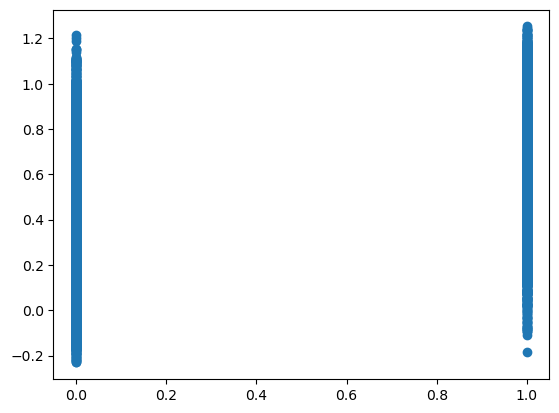

In [115]:
plt.scatter(y, svr.predict(X))

In [116]:
svr.score(X, y)

0.26119297115429896

In [117]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, y, cv=5)

array([0.23713609, 0.29646319, 0.25473193, 0.23675531, 0.28065035])

## Logistic Regression

In [120]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)

lr_score = lr.score(X_test, y_test)
lr_predictions = lr.predict(X_test)

print('Accuracy of Logistic Regression: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression: 0.747


In [121]:
lr2 = LogisticRegression(solver='lbfgs', penalty='none', max_iter=10000, random_state=2)
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.741625
Score on test data:  0.7465


In [122]:
lr_regularized = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=2)
lr_regularized.fit(X_train, y_train)

test_score = lr_regularized.score(X_test, y_test)
train_score = lr_regularized.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.741625
Score on test data:  0.7465


In [128]:
# SVM Model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Cross-Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# SVM
svm_cv_scores = cross_val_score(svm_model, X, y, cv=k_fold, scoring='accuracy')
svm_avg_cv_accuracy = svm_cv_scores.mean()

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)

# Logistic Regression Cross-Validation
logistic_cv_scores = cross_val_score(logistic_model, X, y, cv=k_fold, scoring='accuracy')
logistic_avg_cv_accuracy = logistic_cv_scores.mean()

# Print results
print("Holdout Validation:")
print("SVM Accuracy:", svm_accuracy)
print("Logistic Regression Accuracy:", logistic_accuracy)

print("\nCross-Validation:")
print("SVM Average CV Accuracy:", svm_avg_cv_accuracy)
print("Logistic Regression Average CV Accuracy:", logistic_avg_cv_accuracy)

/Users/haleyallen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/haleyallen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Holdout Validation:
SVM Accuracy: 0.7495
Logistic Regression Accuracy: 0.7515

Cross-Validation:
SVM Average CV Accuracy: 0.7402
Logistic Regression Average CV Accuracy: 0.7413000000000001


/Users/haleyallen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/haleyallen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

### Both of these models do well at predicting diabetes. The logistic regression model may slightly out-perform the SVM model, so it may be best to use this model especially with the data set's size.